In [4]:
# For going through examples in data science notebook
import numpy as np
rand = np.random.RandomState(42)
X=rand.rand(10, 2)

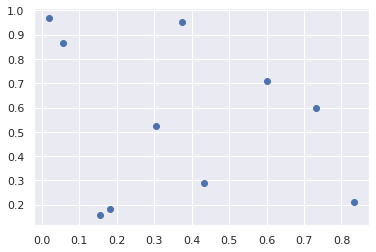

In [9]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:, 0], X[:, 1])

In [20]:
# np newaxis increases dimension by + 1
differences = X[:, np.newaxis, :] - X[np.newaxis, :, :]
differences.shape
# Matrix 1 is point 1 minus all other points etc

(10, 10, 2)

In [33]:
# Square the differences and sum to get the euclidean distance measure
sq_diffs = differences ** 2
sq_diffs.shape
distances = sq_diffs.sum(-1)

In [35]:
# Now we need to order by each row to find each points closest neighbour
nearest = np.argsort(distances, axis=1)
print(nearest)

[[0 3 4 5 8 1 9 7 2 6]
 [1 4 6 9 8 0 7 3 2 5]
 [2 7 9 8 6 4 3 1 0 5]
 [3 5 0 8 4 9 7 2 1 6]
 [4 1 0 8 9 6 3 5 7 2]
 [5 3 0 8 4 9 1 7 2 6]
 [6 1 9 4 8 7 2 0 3 5]
 [7 2 9 8 6 4 1 3 0 5]
 [8 9 4 7 2 3 0 1 5 6]
 [9 8 7 2 6 1 4 0 3 5]]


In [40]:
# The first nearest point is itself, as you can see by the first column. Therefore we require the 
K = 2
nearest_partition = np.argpartition(distances, K+1, axis=1)
nearest_partition

array([[3, 0, 4, 5, 8, 9, 1, 7, 2, 6],
       [1, 4, 6, 9, 3, 5, 2, 7, 8, 0],
       [2, 7, 9, 8, 6, 4, 5, 1, 3, 0],
       [3, 5, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 4, 0, 8, 9, 6, 2, 7, 5, 3],
       [5, 3, 0, 8, 4, 1, 6, 7, 2, 9],
       [1, 9, 6, 4, 3, 5, 2, 7, 8, 0],
       [7, 2, 9, 8, 6, 4, 5, 1, 3, 0],
       [8, 9, 4, 7, 2, 3, 0, 1, 5, 6],
       [8, 7, 9, 2, 1, 6, 4, 5, 3, 0]])

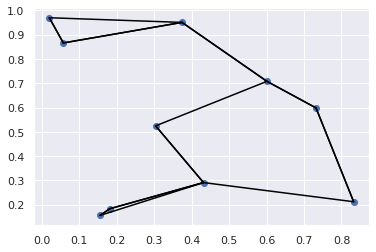

In [50]:
plt.scatter(X[:, 0], X[:, 1])

K=2
for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        plt.plot(*zip(X[j], X[i]), color='black')